In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


In [2]:
date = "JUN21"

chain = ROOT.TChain("events")
chain.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))
df_SGN = ROOT.RDataFrame(chain)

In [3]:
df_SGN = df_SGN.Define("scale", "w*lumiIntegrated")\
            .Define("goodMeson_ditrk_mass_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[3]")\
            .Define("goodMeson_ditrk_pt_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[0]")\
            .Define("goodMeson_leadtrk_pt_GEN", "getMaximum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 333, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -211, 333, 25))")\
            .Define("goodMeson_subleadtrk_pt_GEN", "getMinimum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 333, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -211, 333, 25))")\
            .Define("goodPhotons_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)")\
            .Define("goodMeson_DR_GEN", "getDR(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, -211, 333, 25, 211, 333, 25)")\
            .Define("goodMeson_mass_GEN", "get3BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 111, 333, 25)[3]")\
            .Define("goodMeson_pt_GEN", "get3BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 111, 333, 25)[0]")\
            .Define("HCandMass_GEN", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 333, 25, 22, 25)[3]")\
            .Define("HCandMassMissing", "compute_HiggsVars_var(goodMeson_ditrk_pt[0],goodMeson_ditrk_eta[0],goodMeson_ditrk_phi[0],goodMeson_ditrk_mass[0],photon_pt,goodPhotons_eta[index_pair[1]],goodPhotons_phi[index_pair[1]],0)")\
            .Define("HCandMassMissing_GEN", "getHiggsPtEtaPhiMPhi3Ditrack(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[3]")

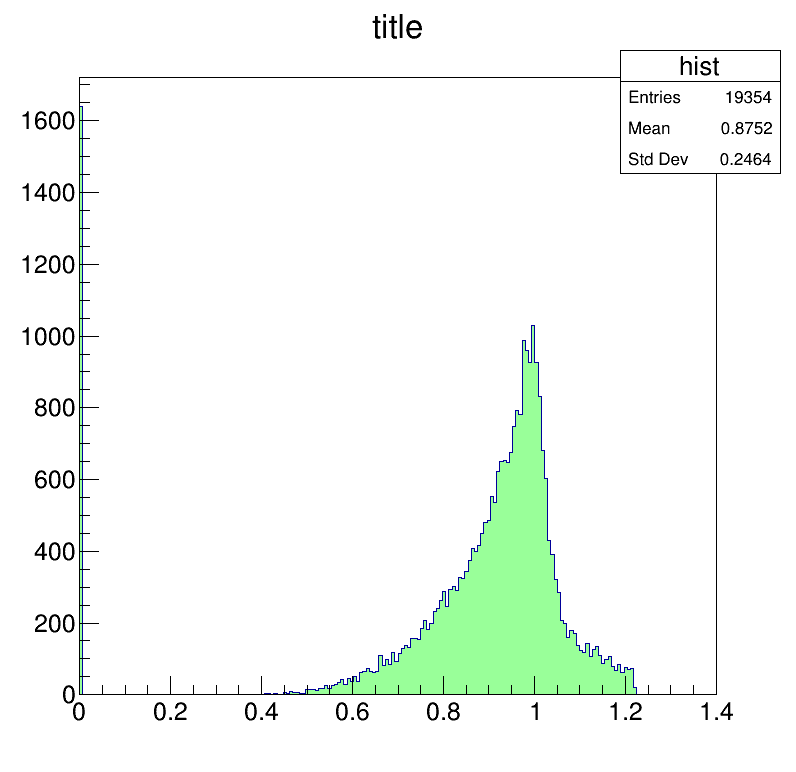

In [4]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 800)

nbins, xlow, xhigh = 200, 0, 1.4

h = df_SGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_mass", "scale")
h.SetFillColor(ROOT.kGreen-9)
h.Draw("hist")

canvas.Draw()

In [20]:
#dfnew = df_D0Star.Filter("goodMeson_ditrk_pt_GEN  < 35").Filter("goodMeson_ditrk_pt_GEN  > 5")

cols = ["goodMeson_pt", "goodMeson_eta", "goodMeson_phi", "goodMeson_mass", "goodMeson_ditrk_pt", "goodMeson_ditrk_eta", "goodMeson_ditrk_phi", "goodMeson_ditrk_mass", "goodMeson_Nphotons", "goodMeson_photons_pt", "goodMeson_photons_eta", "goodMeson_photons_phi"]

x = df_SGN.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

#display(pddf[(pddf["goodMeson_mass"] == 0) & (pddf["goodMeson_ditrk_pt_GEN2"]>0)])
#display(pddf[(pddf["goodMeson_ditrk_pt_GEN2"] != pddf["goodMeson_ditrk_pt_GEN"])])
#display(pddf[(pddf["goodMeson_mass"] == 0)])
for e in cols:
    pddf[e] = pddf[e].apply(lambda x: x[0])

pddf["Sum"] = pddf.apply(lambda row: ROOT.test(row["goodMeson_ditrk_pt"], row["goodMeson_ditrk_eta"], row["goodMeson_ditrk_phi"],\
                                                row["goodMeson_ditrk_mass"], row["goodMeson_photons_pt"], row["goodMeson_photons_eta"],\
                                                row["goodMeson_photons_phi"]), axis=1)

pddf["SumPT"] = pddf["Sum"].apply(lambda x: x.pt())
pddf["SumEta"] = pddf["Sum"].apply(lambda x: x.Eta())
pddf["SumPhi"] = pddf["Sum"].apply(lambda x: x.Phi())
pddf["SumMass"] = pddf["Sum"].apply(lambda x: x.M())

#pddf['goodMeson_Nphotons'] = pddf['goodMeson_Nphotons'].apply(lambda x: x[0])
display(pddf[(pddf["goodMeson_mass"] > 0) & (abs(pddf["goodMeson_pt"] - pddf["SumPT"]) > 0.01) & (pddf["goodMeson_Nphotons"] == 1)])

,goodMeson_pt,goodMeson_eta,goodMeson_phi,goodMeson_mass,goodMeson_ditrk_pt,goodMeson_ditrk_eta,goodMeson_ditrk_phi,goodMeson_ditrk_mass,goodMeson_Nphotons,goodMeson_photons_pt,goodMeson_photons_eta,goodMeson_photons_phi,Sum,SumPT,SumEta,SumPhi,SumMass
17,48.601429,-0.659015,0.615859,0.922002,33.108242,-0.661032,0.619928,0.644544,1,15.546875,-0.649312,0.607147,"(48.6543,-0.657306,0.615844,0.873813)",48.654251,-0.657306,0.615844,0.873813
76,155.976456,1.075673,-0.528180,0.699649,91.055527,1.077791,-0.526778,0.474293,1,92.750000,1.075777,-0.529118,"(183.805,1.07678,-0.527959,0.734209)",183.805405,1.076776,-0.527959,0.734209
134,41.436172,1.518603,-0.735759,0.536751,65.200600,1.515102,-0.725273,0.427525,1,18.453125,1.522935,-0.743772,"(83.6513,1.51686,-0.729354,0.847791)",83.651268,1.516861,-0.729354,0.847791
139,63.328827,-0.856601,-1.374386,1.183844,71.693024,-0.862424,-1.377888,0.716790,1,18.265625,-0.843043,-1.354728,"(89.9547,-0.85854,-1.37319,1.35461)",89.954742,-0.858540,-1.373186,1.354607
161,34.555859,-0.367564,-0.837089,0.824555,40.767059,-0.362377,-0.844464,0.791540,1,13.179688,-0.383068,-0.832839,"(53.9461,-0.367451,-0.841624,1.0647)",53.946072,-0.367451,-0.841624,1.064695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19268,41.730968,1.270415,0.082302,0.666833,32.847134,1.268919,0.086382,0.507780,1,8.992188,1.275735,0.067481,"(41.8381,1.27041,0.0823202,0.669873)",41.838062,1.270413,0.082320,0.669873
19277,59.551689,1.022291,-1.483918,1.039251,51.505699,1.018516,-1.486416,0.727160,1,7.781250,1.046846,-1.467527,"(59.2857,1.02229,-1.48394,1.03668)",59.285744,1.022285,-1.483937,1.036681
19296,66.567894,-1.965298,-0.113499,1.077206,29.771881,-1.977525,-0.123727,0.622776,1,51.375000,-1.966430,-0.111722,"(81.1455,-1.97053,-0.116127,1.20546)",81.145523,-1.970531,-0.116127,1.205456
19304,44.866463,1.410846,-0.715570,1.088942,22.135721,1.392733,-0.720752,0.382590,1,18.984375,1.434492,-0.709885,"(41.1195,1.41222,-0.715735,1.02888)",41.119492,1.412218,-0.715735,1.028880


In [9]:
#dfnew = df_D0Star.Filter("goodMeson_ditrk_pt_GEN  < 35").Filter("goodMeson_ditrk_pt_GEN  > 5")

cols = ["goodMeson_pt", "goodMeson_eta", "goodMeson_phi", "goodMeson_mass", "goodMeson_ditrk_pt", "goodMeson_ditrk_eta", "goodMeson_ditrk_phi", "goodMeson_ditrk_mass", "goodMeson_Nphotons", "goodMeson_photons_pt", "goodMeson_photons_eta", "goodMeson_photons_phi"]

x = df_SGN.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

#display(pddf[(pddf["goodMeson_mass"] == 0) & (pddf["goodMeson_ditrk_pt_GEN2"]>0)])
#display(pddf[(pddf["goodMeson_ditrk_pt_GEN2"] != pddf["goodMeson_ditrk_pt_GEN"])])
#display(pddf[(pddf["goodMeson_mass"] == 0)])
for e in cols[:4]:
    pddf[e] = pddf[e].apply(lambda x: x[0])


#pddf['goodMeson_Nphotons'] = pddf['goodMeson_Nphotons'].apply(lambda x: x[0])
display(pddf[(pddf["goodMeson_mass"] == 0)])

,goodMeson_pt,goodMeson_eta,goodMeson_phi,goodMeson_mass,goodMeson_ditrk_pt,goodMeson_ditrk_eta,goodMeson_ditrk_phi,goodMeson_ditrk_mass,goodMeson_Nphotons,goodMeson_photons_pt,goodMeson_photons_eta,goodMeson_photons_phi
26,0.0,-99.0,-99.0,0.0,[21.987329483032227],[-0.39841634035110474],[1.0142107009887695],[0.5073749423027039],[2],[-1.0],[0.0],[0.0]
38,0.0,-99.0,-99.0,0.0,[57.390281677246094],[1.1597099304199219],[-2.2030115127563477],[0.6192908883094788],[1],[-1.0],[0.0],[0.0]
44,0.0,-99.0,-99.0,0.0,[47.78782653808594],[0.46112990379333496],[-2.803821086883545],[0.7293917536735535],[1],[-1.0],[0.0],[0.0]
45,0.0,-99.0,-99.0,0.0,[37.85580825805664],[0.37802281975746155],[2.429685115814209],[0.6456540822982788],[2],[-1.0],[0.0],[0.0]
54,0.0,-99.0,-99.0,0.0,[25.81138801574707],[0.14224062860012054],[-1.5779222249984741],[0.5351846218109131],[1],[-1.0],[0.0],[0.0]
...,...,...,...,...,...,...,...,...,...,...,...,...
19286,0.0,-99.0,-99.0,0.0,[38.7965202331543],[0.035781968384981155],[-0.6287145614624023],[0.5726671814918518],[1],[-1.0],[0.0],[0.0]
19294,0.0,-99.0,-99.0,0.0,[24.59137535095215],[0.8607140779495239],[2.448868751525879],[0.45668575167655945],[2],[-1.0],[0.0],[0.0]
19309,0.0,-99.0,-99.0,0.0,[36.537315368652344],[1.2637865543365479],[-2.7849369049072266],[0.5585904717445374],[2],[-1.0],[0.0],[0.0]
19331,0.0,-99.0,-99.0,0.0,[77.9026107788086],[1.4840219020843506],[1.1143079996109009],[0.6726130247116089],[1],[-1.0],[0.0],[0.0]


In [30]:
rownum = 44328
part_id = pddf.iloc[rownum]["GenPart_pdgId"]
mother_idx = pddf.iloc[rownum]["GenPart_genPartIdxMother"]
part_pt = pddf.iloc[rownum]["GenPart_pt"]
part_mass = pddf.iloc[rownum]["GenPart_mass"]
print(pddf.iloc[rownum]["goodMeson_ditrk_pt_GEN"], pddf.iloc[rownum]["goodMeson_ditrk_pt_GEN2"])

width = 8
#print(len(part_id), len(mother_idx), len(part_pt), len(part_mass))
print("Index".ljust(width), "ID".ljust(width), "Mum idx".ljust(width), "PT".ljust(width), "Mass".ljust(width))
print("---------------------------------------------------------------------------")
for e in range(len(part_id)):
    print(str(e).ljust(width), str(part_id[e]).ljust(width), str(mother_idx[e]).ljust(width), str(round(part_pt[e], 3)).ljust(width), str(round(part_mass[e], 4)).ljust(width))

13.427914 13.427914
Index    ID       Mum idx  PT       Mass    
---------------------------------------------------------------------------
0        2212     -1       0.0      0.9375  
1        2212     -1       0.0      0.9375  
2        21       0        0.0      0.0     
3        21       1        0.0      0.0     
4        25       2        114.5    125.0   
5        21       2        114.5    0.0     
6        25       4        145.5    125.0   
7        21       5        109.0    0.0     
8        5        7        74.25    0.0     
9        -5       7        36.875   0.0     
10       -4       1        18.25    0.0     
11       4        1        21.0     0.0     
12       25       6        146.0    125.0   
13       5        8        73.5     0.0     
14       -4       10       18.25    0.0     
15       -5       9        36.5     0.0     
16       4        11       20.938   0.0     
17       25       12       147.0    125.0   
18       5        13       73.5     0.0     
19  